# Snooker Player Status

I am an amateur player snooker player, had intentions like most to be a professional in my younger days. The game still fascinates me like it did, the first time I went into a club. Many men and women play sports at an amateur and have tried to become professional in preparation and technique. There is much more information now where is helping people to understand how a professional prepares. 

I have always wondered what the relationship is with the data I have chosen, and I am going to investigate the main factors that can contribute to your status. Not like golf, where is the handicap system for players where an amateur can aim to be a scratch player meaning they could compete professionally, snooker still hasn't developed this system.

The following dataset is based on players over 2 seasons, so if the player has become a professional, they would only have been on tour for one year. 

Variables used:

#### players - 

which is the number of players for the dataset. 

#### gender - 
If the player is male or female. Not like many other sports men and women can compete in the same the tournaments. 4 women have competed on the main snooker tour since its existence, so this shows there is a big disparity in participation.

#### practice - 

For setting the range for the practice variable, I took the benchmark as 4 time world champion Mark Selby. He is a full time professional, who plays 6 hours a day. From my own knowledge that is more than likey correct and the professionals, take one day off. 36 hours a week and take approximately 4 weeks off. So the total practice time for professional is approximately 1728 hours per year. So as an amateur, I would set the maximum time to practice as 24 hours overall for a semi-professional or amateur player.

In the dataframe, the hours are based over 2 seasons and I have set the limits for the conditions my own knowlegde and information found. To be a professional you would need to be doing at least 3/4 of the time what I researched. There may be some amatuers getting near the hour limit but you also need some talent.

#### comp_match_wins - 

How many wins the player had in competitve tournament wins on national tour or main tour, for a season. The range for this is set in a two season period, you can qualify through to the main tour in many ways. In order to play in any of the events to qualify on the main tour, you would need to be the number one player in your country playing the national amateur events, so you would have to have won the most matches in that year. 

Anybody new on the professional tour would have had to had qualified through the same path. Hence I am doing 2 seasons as the wins for the previous year and wins on the main tour would have to be counted for a fair reflection. There is no set amount of wins to keep you on the professional tour, as the rankings are based on prize mone. You would want to win at least 16 matches based off last year's main tour rankings to have a chance of staying on the main tour. The last full season where a player qualified as a professional from Ireland, they had to win 14 matches. So I have set the range to 40 wins as is would be based on a high achieving new professional. 

#### comp_centuries - 

This is how many centuries a player had in competitive tournaments overall. What this means is you accumulated 100 points or more in one visit. So you scored 100 points consecutively. 75 players who have played professionally, have scored over a 100 centuries since they were recorded.The level of skill and difficultly can be measured against how many people play around the world. I found an article that referenced 60 million play in China at least. Based off this I weighted the amount probbaility for the different categories.(see comments in code)

The highest amount recorded to date by a single player is almost 1200, which 300 ahead of anybody else.

#### status - 

This is if the player is professional, semi professional or an amateur. Based off the variables I will calculate for the dataset. 


### Setting up the dataframe

In [16]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# setting up the dataframe with columns
df = pd.DataFrame(columns=['player','gender','practice','comp_match_wins',
                           'comp_cen_class','status'])

# setting the players to 100
df['player'] = pd.Series(range(1,101))

# set choices and randomly assign male or female
gender = ['M','F']
df['gender'] = np.random.choice(gender,100, p=[0.95,0.05])

# random assign practice hours to each player
df['practice'] = np.random.randint(0, 3456, 100)

# randomly assign match wins to players
df['comp_match_wins'] = np.random.randint(0, 40, 100)

#randomly assign centuries to players
# lvl 1 > 100, lv2 50- 99, lvl3 21-49, lvl4 0-20
level = ['lvl1','lvl2','lvl3','lvl4']
df['comp_cen_class'] = np.random.choice(level, 100, p=[0.05,0.15, 0.20, 0.60])

# setting conditions for status

cond_stat = [
    (df['practice'] > 2500) & (df['comp_match_wins']>=32),
    (df['practice'] < 2500) & (df['comp_match_wins']>=32) | 
    (df['comp_cen_class'] == 'lvl1') |(df['comp_cen_class'] == 'lvl2'),
    (df['comp_match_wins']<32)
    ]


# Values to be assigned based on conditions
val_stat = ['pro','semipro','ama']
df['status'] = np.select(cond_stat, val_stat)

df.set_index('player', inplace=True)

In [17]:
df

,gender,practice,comp_match_wins,comp_cen_class,status
player,,,,,
1,M,2957,14,lvl4,ama
2,M,1928,1,lvl4,ama
3,M,3291,6,lvl2,semipro
4,M,35,24,lvl4,ama
5,M,419,11,lvl4,ama
...,...,...,...,...,...
96,M,2107,5,lvl3,ama
97,M,670,23,lvl4,ama
98,M,1445,22,lvl4,ama


In [18]:
# print head to check data
df.head()

,gender,practice,comp_match_wins,comp_cen_class,status
player,,,,,
1,M,2957,14,lvl4,ama
2,M,1928,1,lvl4,ama
3,M,3291,6,lvl2,semipro
4,M,35,24,lvl4,ama
5,M,419,11,lvl4,ama


In [19]:
# check the datatypes
df.dtypes

gender             object
practice            int32
comp_match_wins     int32
comp_cen_class     object
status             object
dtype: object

In [20]:
# count the number each statuses
df.value_counts("status")

status
ama        67
semipro    28
pro         5
dtype: int64

In [21]:
# show totals
pd.unique(df['status'])

array(['ama', 'semipro', 'pro'], dtype=object)

#### Show the status count

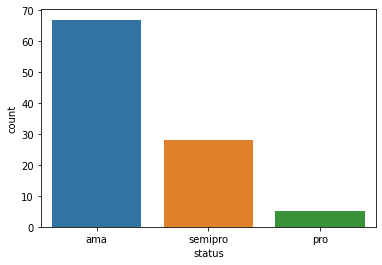

In [22]:
import seaborn as sns

sns.countplot(x='status', data=df, )
plt.show()

The graph shows that the highest status from this group of players is amateurs. This makes sense as it is a high amount of wins to become a professional and the amount of practice you need to do. The majority of amatuer players are employed or have family committments which makes it hard to do the hours required to be a professional. 

Being a semi-pro is a difficult life as you need to be winning alot, so you don't require a part-time job. With the hours of practice you need it pay dividends to continue the massive committment.

C:\Users\james\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


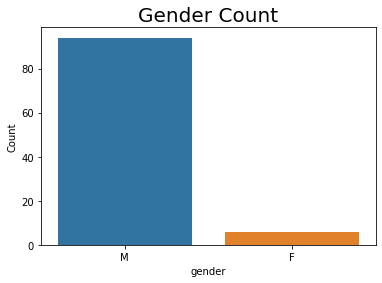

In [23]:
# Show the disparity between Male and Female players

gen_count = sns.countplot('gender', data=df)
gen_count.axes.set_title('Gender Count',fontsize=20)
gen_count.set_ylabel("Count",fontsize=10)
plt.show()

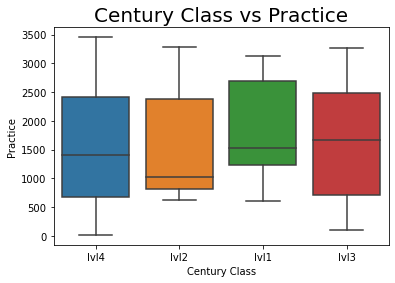

In [24]:
# Showing the difficuly of how hard it is to make 100> centuries

cen_comp = sns.boxplot(x='comp_cen_class', y='practice', data=df)
cen_comp.axes.set_title('Century Class vs Practice', fontsize = 20)
cen_comp.set_xlabel('Century Class', fontsize = 10)
cen_comp.set_ylabel('Practice', fontsize = 10)
plt.show()

Based on this data, the level 1 class of century makers don't do less than 1000 hours practice. Also they have the highest amount of practice hours so it shows that you need to be very dedicated to make the level 1 class. Level 4 is interesting as there is some players who are putting in over 2000 hours but are still at level 4. 

Like any sport, there is an intangible variable which is talent. Some players in the level 3 class at the lower end of practice may have considerable talent when they are doing similar amount of hours at the lower end of level 4.

### Scatter plot for status vs wins

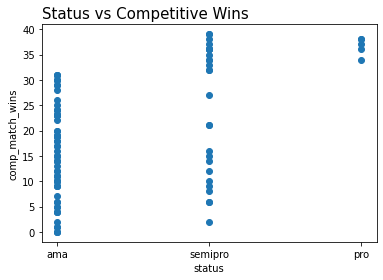

In [25]:
plt.scatter(df["status"], df["comp_match_wins"])
plt.title("Status vs Competitive Wins", loc ="left", fontsize=15)
plt.xlabel("status")
plt.ylabel("comp_match_wins")

plt.show()

The highest amount of wins is in the professional status as expected. You can see in the semi-pro status, there is a grouping between 10 and 15 wins. This could be down to factors of tough draws in tournaments and even sometimes even luck. There is a couple of low plots for semi-pro which would mean they are out of form or have not entered many tournaments so they have less wins.

### Scatter plot for status vs practice

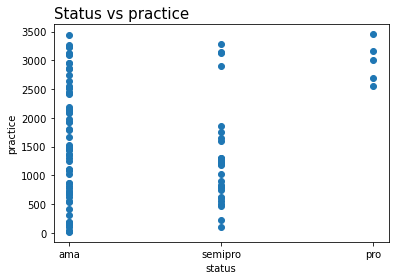

In [26]:
plt.scatter(df["status"], df["practice"])
plt.title("Status vs practice", loc ="left", fontsize=15)
plt.xlabel("status")
plt.ylabel("practice")

plt.show()

Each status is near the top of the range. I believe this demonstrates the talent levels. You can be doing a high amount of hours but you need to get the wins to progress. The professional status is concentrated at the top of the range, so you need to doing the hours to be doing at least over 2000 hours practice.

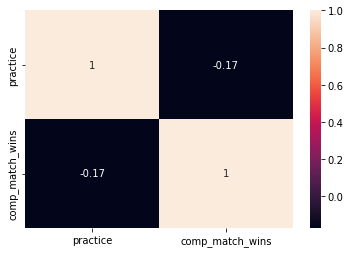

In [27]:
# Create the heatmap, annot = true is write each data value in the cell.
x = sns.heatmap(df.corr(),annot=True)
plt.plot()
plt.show()

What this shows us, is that practice hours and comp_match_wins don't correlate. This makes sense in the real world, as the intangibles can play a part in how many matches you win such as luck and talent. From the scatter plots we found practice only really correlates with professionals. Professionals have the talent along with the time to practice, when you have both, this makes you successful.

In [28]:
# getting the statistics of matches won which has probably the strongest
# influence on player status
df['comp_match_wins'].describe()

count    100.000000
mean      19.440000
std       11.377206
min        0.000000
25%       10.000000
50%       19.000000
75%       30.000000
max       39.000000
Name: comp_match_wins, dtype: float64

### Normal Distribution for competitive wins

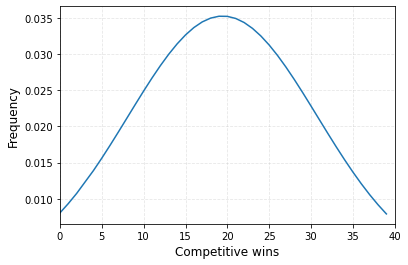

In [56]:
import scipy.stats as stats

df_mean = np.mean(df["comp_match_wins"])
df_std = np.std(df["comp_match_wins"])
 
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df["comp_match_wins"].sort_values(), df_mean, df_std)

# Drawing a graph
plt.plot(df["comp_match_wins"].sort_values(), pdf)
plt.xlim([0,40])  
plt.xlabel("Competitive wins", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

The graph shows that the dataset is normally distribution as it represents a bell-curve. This makes sense there would only be small group with more that 32 competitive match wins. Also there would be a small number of 0 wins as players would get some wins as most draws would be ranking based. The lower ranked players would play each other at the start of tournaments, which give players an opportunity to play some matches where your opponent is of a similar standard.